In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX # Predictive analysis model used

In [229]:
file = pd.read_csv("GlobalLandTemperaturesByCountry.csv")

In [230]:
file['dt'] = pd.to_datetime(file['dt'],format ='%Y-%m-%d')

In [231]:
usa_df = file[file['Country'] == 'United States'].sort_values('dt')
usa_df = usa_df.set_index('dt')

In [232]:
model = SARIMAX(usa_df['AverageTemperature'], order=(1,1,1), seasonal_order=(1,1,1,12),enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

c:\Launch Training\Week 1\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Launch Training\Week 1\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [233]:
forecast = results.get_forecast(steps=30)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()


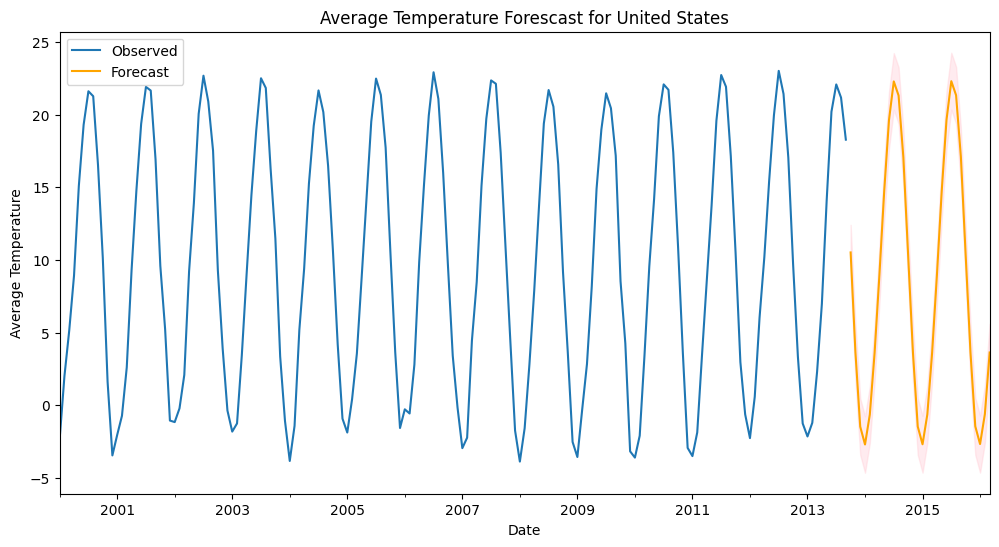

In [234]:
start_date = '2000-01-01'
end_date = predicted_mean.index[-1]  # end at the forecast horizon

usa_df['AverageTemperature'].loc[start_date:].plot(label='Observed', figsize=(12, 6))
predicted_mean.plot(label='Forecast',color='orange')
plt.fill_between(predicted_mean.index, conf_int.iloc[:,0],conf_int.iloc[:,1],color='pink',alpha=0.3)
plt.xlim([start_date, end_date])  # Limit x-axis to recent years

plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Forescast for United States')
plt.legend()
plt.show()


In [235]:
usa_df

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1768-09-01,15.420,2.880,United States
1768-10-01,8.162,3.386,United States
1768-11-01,1.591,3.783,United States
1768-12-01,-2.882,4.979,United States
1769-01-01,-3.952,4.856,United States
...,...,...,...
2013-05-01,14.073,0.178,United States
2013-06-01,20.198,0.236,United States
2013-07-01,22.074,0.152,United States


In [236]:
# conf_int

C:\Users\elija\AppData\Local\Temp\ipykernel_44160\3055529949.py:12: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  monthly_avg = usa_df['AverageTemperature'].resample('Y').mean()


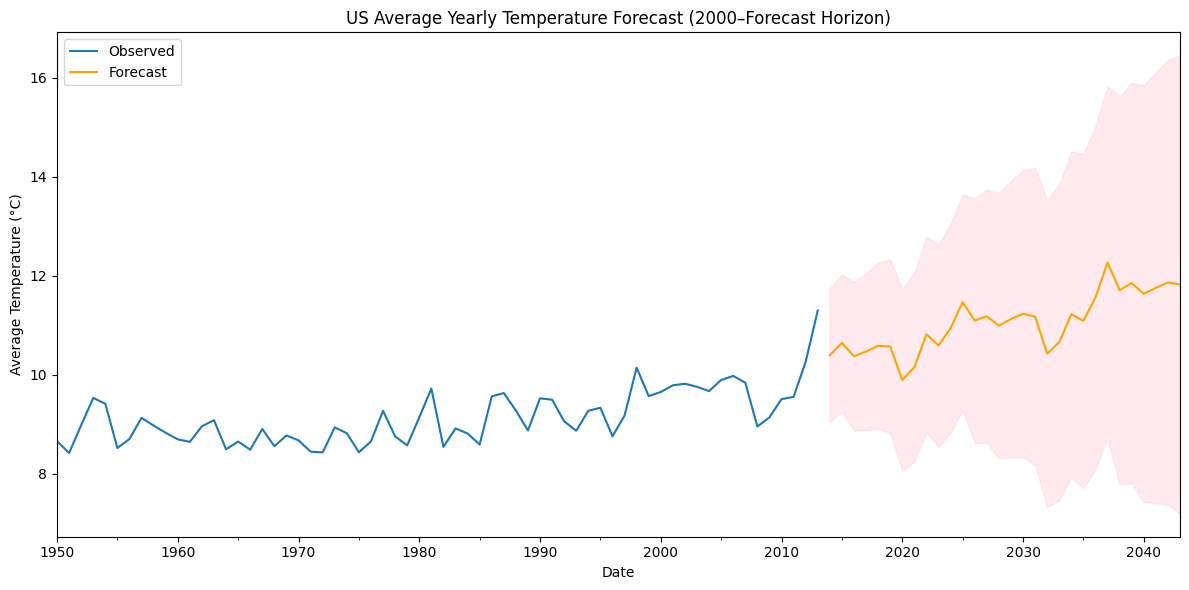

In [237]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

file = pd.read_csv("GlobalLandTemperaturesByCountry.csv")
file['dt'] = pd.to_datetime(file['dt'], format='%Y-%m-%d')

usa_df = file[file['Country'] == 'United States'].sort_values('dt')
usa_df = usa_df.set_index('dt')

monthly_avg = usa_df['AverageTemperature'].resample('Y').mean()

model = SARIMAX(monthly_avg, 
                order=(1,1,1), 
                seasonal_order=(1,1,1,12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
results = model.fit()

forecast = results.get_forecast(steps=30)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

start_date = '1950-01-01'
end_date = predicted_mean.index[-1]

monthly_avg.loc[start_date:].plot(label='Observed', figsize=(12, 6))

predicted_mean.plot(label='Forecast', color='orange')

plt.fill_between(predicted_mean.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)

plt.xlim([start_date, end_date])
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('US Average Yearly Temperature Forecast (2000–Forecast Horizon)')
plt.legend()
plt.tight_layout()
plt.show()


In [238]:
unique_values = file['Country'].unique()
# print(unique_values)

In [239]:
df_lst = file['Country'].values.tolist()
# df_lst

In [240]:
import re 
pattern = re.compile(r"\(Europe\)$")
north_american_set = set()
south_american_set = set()
european_set = set()
asia_set = set()
oceania_set = set()
african_set = set()
north_american_countries = ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 
                            'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 
                            'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 
                            'Trinidad and Tobago', 'United States', 'Greenland', 'Martinique', 'Virgin Islands', 
                            'British Virgin Islands', 'North America']
north_american_countries_stripped = []
for north_american_country in north_american_countries:
    north_american_countries_stripped.append(north_american_country.strip().lower())


south_american_countries = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana',
                            'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
south_american_countries_stripped = []
for south_american_country in south_american_countries:
    south_american_countries_stripped.append(south_american_country.strip().lower())


european_countries = ["Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", 
                      "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Finland", "France", 
                      "Germany", "Georgia", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kosovo", 
                      "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta", "Moldova", "Montenegro",
                       "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Russia",
                       "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", 
                       "Turkey", "Ukraine", "United Kingdom", 'Czech Republic', 'Macedonia']
european_countries_stripped = []
for european_country in european_countries:
    european_countries_stripped.append(european_country.strip().lower())


asia_countries = ["Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei", 
                  "Cambodia", "China", "Cyprus", "Georgia", "India", "Indonesia", "Iran", "Iraq", "Israel", 
                  "Japan", "Jordan", "Kazakhstan", "Kuwait", "Kyrgyzstan", "Laos", "Lebanon", "Malaysia", 
                  "Maldives", "Mongolia", "Myanmar", "Nepal", "North Korea", "Oman", "Pakistan", "Philippines", 
                  "Qatar", "Saudi Arabia", "Singapore", "South Korea", "Sri Lanka", "State of Palestine", 
                  "Syria", "Tajikistan", "Thailand", "Timor-Leste", "Turkey", "Turkmenistan", 
                  "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen", 'Taiwan']
asia_countries_stripped = []
for asia_country in asia_countries:
    asia_countries_stripped.append(asia_country.strip().lower())

african_countries = ["Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde", "Cameroon",
    "Central African Republic (CAR)", "Chad", "Comoros", "Congo, Democratic Republic of the",
    "Congo, Republic of the", "Cote d'Ivoire", "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea",
    "Eswatini (formerly Swaziland)", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau",
    "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius",
    "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe", "Senegal",
    "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan", "Sudan", "Tanzania", "Togo",
    "Tunisia", "Uganda", "Zambia", "Zimbabwe", 'Congo']
african_countries_stripped = []
for african_country in african_countries:
    african_countries_stripped.append(african_country.strip().lower())



oceania_countries = ['Australia', 'Papua New Guinea', 'New Zealand', 'Fiji', 'Solomon Islands', 'Vanuatu', 'Samoa',
                     'Kiribati', 'Micronesia', 'Tonga', 'Marshall Islands', 'Palau', 'Nauru', 'Tuvalu', 'Guam']
oceania_countries_stripped = []
for oceania_country in oceania_countries:
    oceania_countries_stripped.append(oceania_country.strip().lower())
missing_countries = set()



for country in df_lst:
    country_strip = country.strip().lower()
    if (country_strip in north_american_countries_stripped):
        north_american_set.add(country)
    elif (country_strip in south_american_countries_stripped):
        south_american_set.add(country)
    elif (country_strip in european_countries_stripped or pattern.search(country)):
        european_set.add(country)
    elif (country_strip in asia_countries_stripped):
        asia_set.add(country)
    elif (country_strip in oceania_countries_stripped):
        oceania_set.add(country)
    elif (country_strip in african_countries_stripped):
        african_set.add(country)
    else:
        missing_countries.add(country)

for country in missing_countries:
    print(country)



Åland
American Samoa
Central African Republic
Antarctica
Faroe Islands
Saint Pierre And Miquelon
Guernsey
Asia
Macau
Africa
Isle Of Man
Turks And Caicas Islands
Monaco
Burma
Falkland Islands (Islas Malvinas)
Guadeloupe
Mayotte
Western Sahara
Heard Island And Mcdonald Islands
Hong Kong
Europe
Palestina
French Southern And Antarctic Lands
Saint Barthélemy
French Guiana
New Caledonia
Cayman Islands
Anguilla
Gaza Strip
Montserrat
Palmyra Atoll
Timor Leste
Northern Mariana Islands
Bonaire, Saint Eustatius And Saba
Swaziland
Jersey
South America
Saint Martin
Curaçao
Christmas Island
Côte D'Ivoire
Oceania
Cape Verde
Sint Maarten
South Georgia And The South Sandwich Isla
Aruba
Reunion
French Polynesia
Puerto Rico
Baker Island
Federated States Of Micronesia
Guinea Bissau
Kingman Reef
Svalbard And Jan Mayen
Niue
Congo (Democratic Republic Of The)


In [241]:
len(missing_countries)

56

In [242]:
country_to_continent = {}
for country in north_american_countries: 
    country_to_continent[country.lower()] = 'North America'
for country in south_american_countries:
    country_to_continent[country.lower()] = 'South America'

for country in european_countries:
    country_to_continent[country.lower()] = 'Europe'

for country in asia_countries:
    country_to_continent[country.lower()] = 'Asia'

for country in oceania_countries:
    country_to_continent[country.lower()] = 'Oceania'

for country in african_countries:
    country_to_continent[country.lower()] = 'Africa'

In [243]:
file['Continent'] = file['Country'].str.strip().str.lower().map(country_to_continent)

In [244]:
unmatched = file[file['Continent'].isna()]
print("unmatched countries:")
print(unmatched['Country'].unique())

unmatched countries:
['Åland' 'Africa' 'American Samoa' 'Anguilla' 'Antarctica' 'Aruba' 'Asia'
 'Baker Island' 'Bonaire, Saint Eustatius And Saba' 'Burma'
 "Côte D'Ivoire" 'Cape Verde' 'Cayman Islands' 'Central African Republic'
 'Christmas Island' 'Congo (Democratic Republic Of The)' 'Curaçao'
 'Denmark (Europe)' 'Europe' 'Falkland Islands (Islas Malvinas)'
 'Faroe Islands' 'Federated States Of Micronesia' 'France (Europe)'
 'French Guiana' 'French Polynesia' 'French Southern And Antarctic Lands'
 'Gaza Strip' 'Guadeloupe' 'Guernsey' 'Guinea Bissau'
 'Heard Island And Mcdonald Islands' 'Hong Kong' 'Isle Of Man' 'Jersey'
 'Kingman Reef' 'Macau' 'Mayotte' 'Monaco' 'Montserrat'
 'Netherlands (Europe)' 'New Caledonia' 'Niue' 'Northern Mariana Islands'
 'Oceania' 'Palestina' 'Palmyra Atoll' 'Puerto Rico' 'Reunion'
 'Saint Barthélemy' 'Saint Martin' 'Saint Pierre And Miquelon'
 'Sint Maarten' 'South America'
 'South Georgia And The South Sandwich Isla' 'Svalbard And Jan Mayen'
 'Swaziland' 

In [245]:
file['dt']

0        1743-11-01
1        1743-12-01
2        1744-01-01
3        1744-02-01
4        1744-03-01
            ...    
577457   2013-05-01
577458   2013-06-01
577459   2013-07-01
577460   2013-08-01
577461   2013-09-01
Name: dt, Length: 577462, dtype: datetime64[ns]

In [246]:
len(file)

577462

In [247]:
# file.isna().sum()

In [248]:
# file['AverageTemperature'].dropna()

In [249]:
# file.isna().sum()

### Forecasting Average Temp for North America

C:\Users\elija\AppData\Local\Temp\ipykernel_44160\263101856.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg = na_df.groupby('dt')['AverageTemperature'].mean().resample('Y').mean()
c:\Launch Training\Week 1\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Launch Training\Week 1\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Launch Training\Week 1\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_p

()

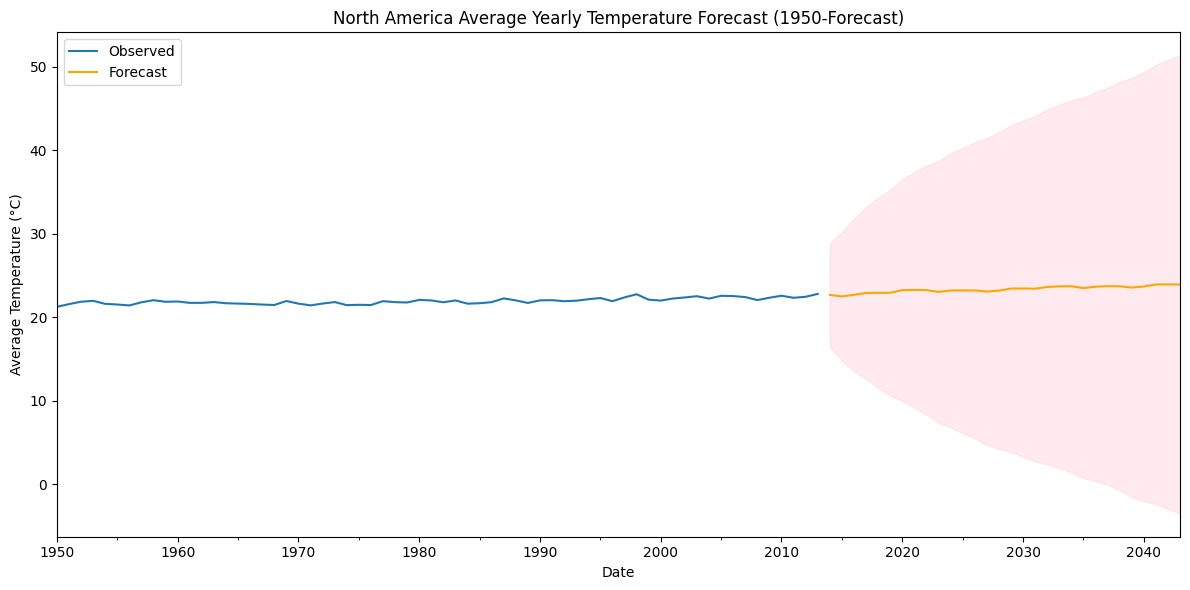

In [250]:
na_df = file[file['Continent'] == 'North America'].sort_values('dt')
na_df = na_df.set_index('dt')

yearly_avg = na_df.groupby('dt')['AverageTemperature'].mean().resample('Y').mean()
yearly_avg = yearly_avg.dropna()

model = SARIMAX(yearly_avg, 
                order=(1,1,1), 
                seasonal_order=(1,1,1,12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
results = model.fit()

forecast = results.get_forecast(steps=30)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

predicted_mean.index = pd.date_range(start=yearly_avg.index[-1] + pd.DateOffset(years=1),
                                      periods =30, freq='Y')
conf_int.index = predicted_mean.index

start_date = '1950-01-01'
end_date = predicted_mean.index[-1]


yearly_avg.loc['1950':].plot(label='Observed', figsize=(12, 6))

predicted_mean.plot(label='Forecast', color='orange')

plt.fill_between(predicted_mean.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)

plt.xlim([start_date, end_date])
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('North America Average Yearly Temperature Forecast (1950-Forecast)')
plt.legend()
plt.tight_layout()
plt.show
()

### Forecasting Average Temp for Asia

C:\Users\elija\AppData\Local\Temp\ipykernel_44160\2130513538.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg = na_df.groupby('dt')['AverageTemperature'].mean().resample('Y').mean()
c:\Launch Training\Week 1\myvenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\elija\AppData\Local\Temp\ipykernel_44160\2130513538.py:18: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  predicted_mean.index = pd.date_range(start=yearly_avg.index[-1] + pd.DateOffset(years=1),


()

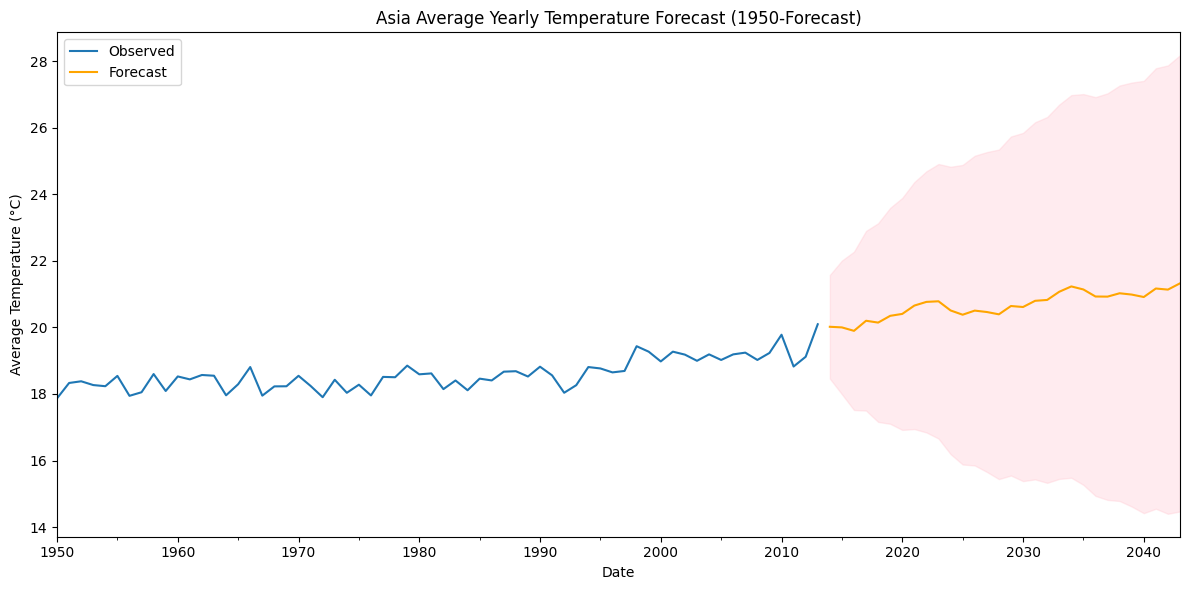

In [ ]:
asia_df = file[file['Continent'] == 'Asia'].sort_values('dt')
asia_df = asia_df.set_index('dt')

yearly_avg = asia_df.groupby('dt')['AverageTemperature'].mean().resample('Y').mean()
yearly_avg = yearly_avg.dropna()

model = SARIMAX(yearly_avg, 
                order=(1,1,1), 
                seasonal_order=(1,1,1,12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
results = model.fit()

forecast = results.get_forecast(steps=30)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

predicted_mean.index = pd.date_range(start=yearly_avg.index[-1] + pd.DateOffset(years=1),
                                      periods =30, freq='Y')
conf_int.index = predicted_mean.index

start_date = '1950-01-01'
end_date = predicted_mean.index[-1]


yearly_avg.loc['1950':].plot(label='Observed', figsize=(12, 6))

predicted_mean.plot(label='Forecast', color='orange')

plt.fill_between(predicted_mean.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)

plt.xlim([start_date, end_date])
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('Asia Average Yearly Temperature Forecast (1950-Forecast)')
plt.legend()
plt.tight_layout()
plt.show
()

C:\Users\elija\AppData\Local\Temp\ipykernel_44160\211051822.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg = na_df.groupby('dt')['AverageTemperature'].mean().resample('Y').mean()
C:\Users\elija\AppData\Local\Temp\ipykernel_44160\211051822.py:18: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  predicted_mean.index = pd.date_range(start=yearly_avg.index[-1] + pd.DateOffset(years=1),


()

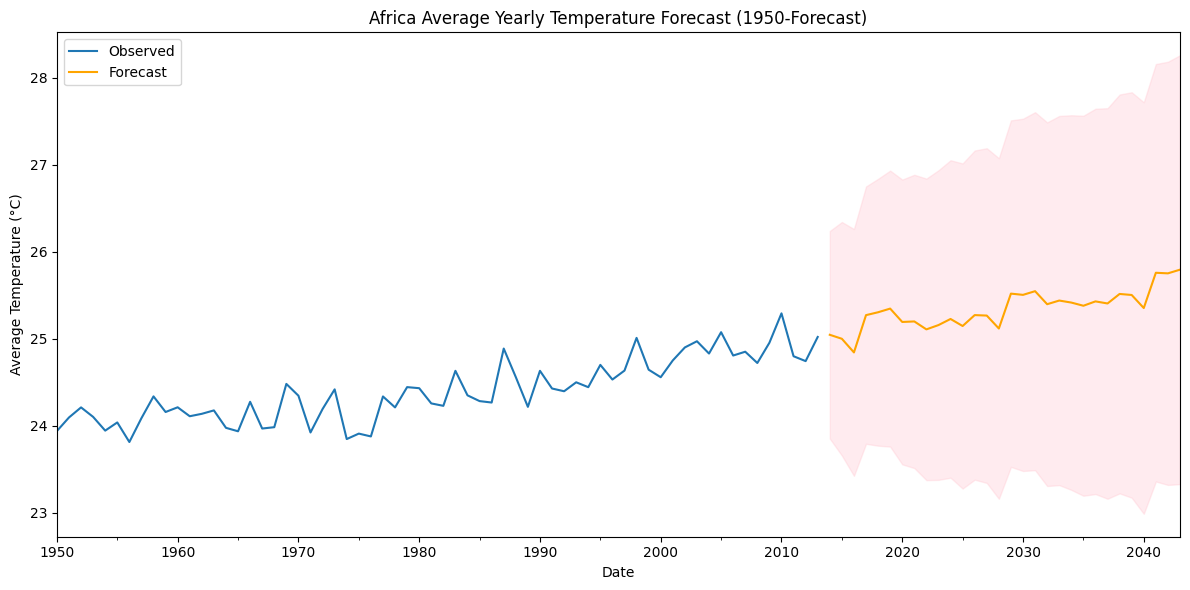

In [ ]:
africa_df = file[file['Continent'] == 'Africa'].sort_values('dt')
africa_df = africa_df.set_index('dt')

yearly_avg = africa_df.groupby('dt')['AverageTemperature'].mean().resample('Y').mean()
yearly_avg = yearly_avg.dropna()

model = SARIMAX(yearly_avg, 
                order=(1,1,1), 
                seasonal_order=(1,1,1,12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
results = model.fit()

forecast = results.get_forecast(steps=30)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

predicted_mean.index = pd.date_range(start=yearly_avg.index[-1] + pd.DateOffset(years=1),
                                      periods =30, freq='Y')
conf_int.index = predicted_mean.index

start_date = '1950-01-01'
end_date = predicted_mean.index[-1]


yearly_avg.loc['1950':].plot(label='Observed', figsize=(12, 6))

predicted_mean.plot(label='Forecast', color='orange')

plt.fill_between(predicted_mean.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)

plt.xlim([start_date, end_date])
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('Africa Average Yearly Temperature Forecast (1950-Forecast)')
plt.legend()
plt.tight_layout()
plt.show
()

C:\Users\elija\AppData\Local\Temp\ipykernel_44160\666662189.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg = oceania_df.groupby('dt')['AverageTemperature'].mean().resample('Y').mean()
C:\Users\elija\AppData\Local\Temp\ipykernel_44160\666662189.py:18: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  predicted_mean.index = pd.date_range(start=yearly_avg.index[-1] + pd.DateOffset(years=1),


()

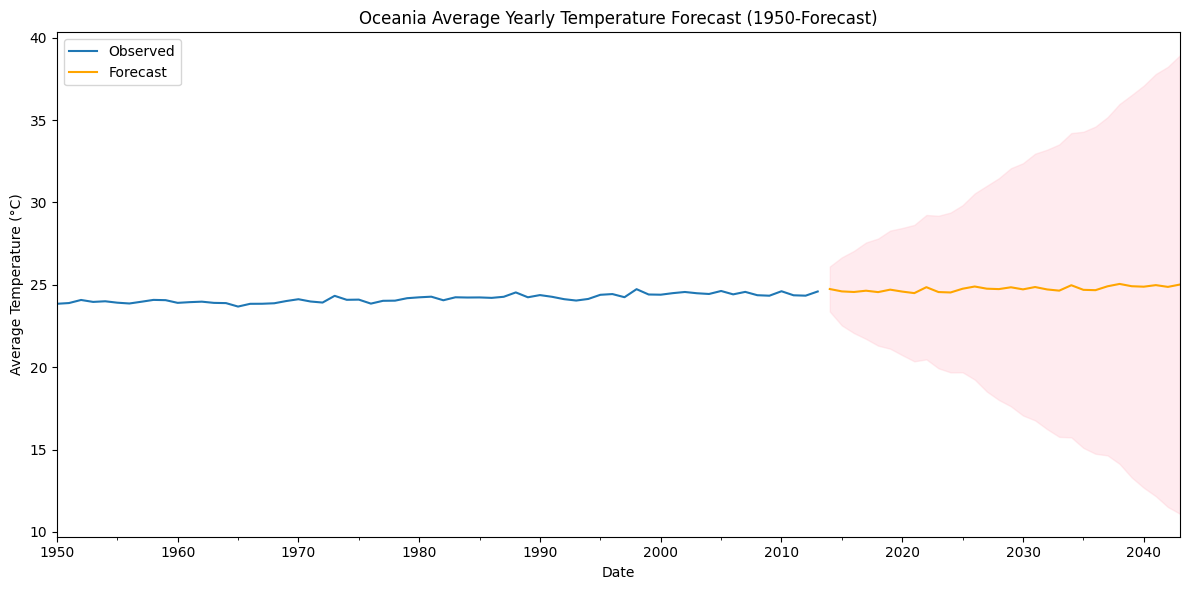

In [256]:
oceania_df = file[file['Continent'] == 'Oceania'].sort_values('dt')
oceania_df = oceania_df.set_index('dt')

yearly_avg = oceania_df.groupby('dt')['AverageTemperature'].mean().resample('Y').mean()
yearly_avg = yearly_avg.dropna()

model = SARIMAX(yearly_avg, 
                order=(1,1,1), 
                seasonal_order=(1,1,1,12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
results = model.fit()

forecast = results.get_forecast(steps=30)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

predicted_mean.index = pd.date_range(start=yearly_avg.index[-1] + pd.DateOffset(years=1),
                                      periods =30, freq='Y')
conf_int.index = predicted_mean.index

start_date = '1950-01-01'
end_date = predicted_mean.index[-1]


yearly_avg.loc['1950':].plot(label='Observed', figsize=(12, 6))

predicted_mean.plot(label='Forecast', color='orange')

plt.fill_between(predicted_mean.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)

plt.xlim([start_date, end_date])
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('Oceania Average Yearly Temperature Forecast (1950-Forecast)')
plt.legend()
plt.tight_layout()
plt.show
()

C:\Users\elija\AppData\Local\Temp\ipykernel_44160\748251185.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg = europe_df.groupby('dt')['AverageTemperature'].mean().resample('Y').mean()
c:\Launch Training\Week 1\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Launch Training\Week 1\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Launch Training\Week 1\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return g

()

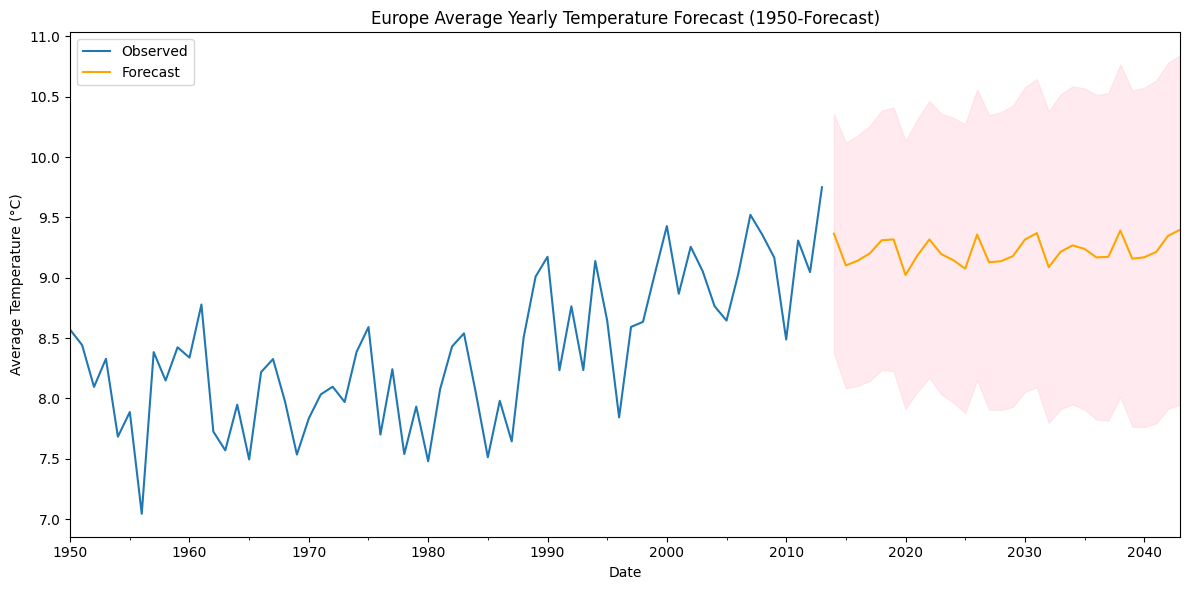

In [255]:
europe_df = file[file['Continent'] == 'Europe'].sort_values('dt')
europe_df = europe_df.set_index('dt')

yearly_avg = europe_df.groupby('dt')['AverageTemperature'].mean().resample('Y').mean()
yearly_avg = yearly_avg.dropna()

model = SARIMAX(yearly_avg, 
                order=(1,1,1), 
                seasonal_order=(1,1,1,12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
results = model.fit()

forecast = results.get_forecast(steps=30)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

predicted_mean.index = pd.date_range(start=yearly_avg.index[-1] + pd.DateOffset(years=1),
                                      periods =30, freq='Y')
conf_int.index = predicted_mean.index

start_date = '1950-01-01'
end_date = predicted_mean.index[-1]


yearly_avg.loc['1950':].plot(label='Observed', figsize=(12, 6))

predicted_mean.plot(label='Forecast', color='orange')

plt.fill_between(predicted_mean.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)

plt.xlim([start_date, end_date])
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('Europe Average Yearly Temperature Forecast (1950-Forecast)')
plt.legend()
plt.tight_layout()
plt.show
()

### Forecasting Average Temp for Angola (Africa)

C:\Users\elija\AppData\Local\Temp\ipykernel_44160\3816822466.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg = south_africa_df.groupby('dt')['AverageTemperature'].mean().resample('Y').mean()
c:\Launch Training\Week 1\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Launch Training\Week 1\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Launch Training\Week 1\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  r

()

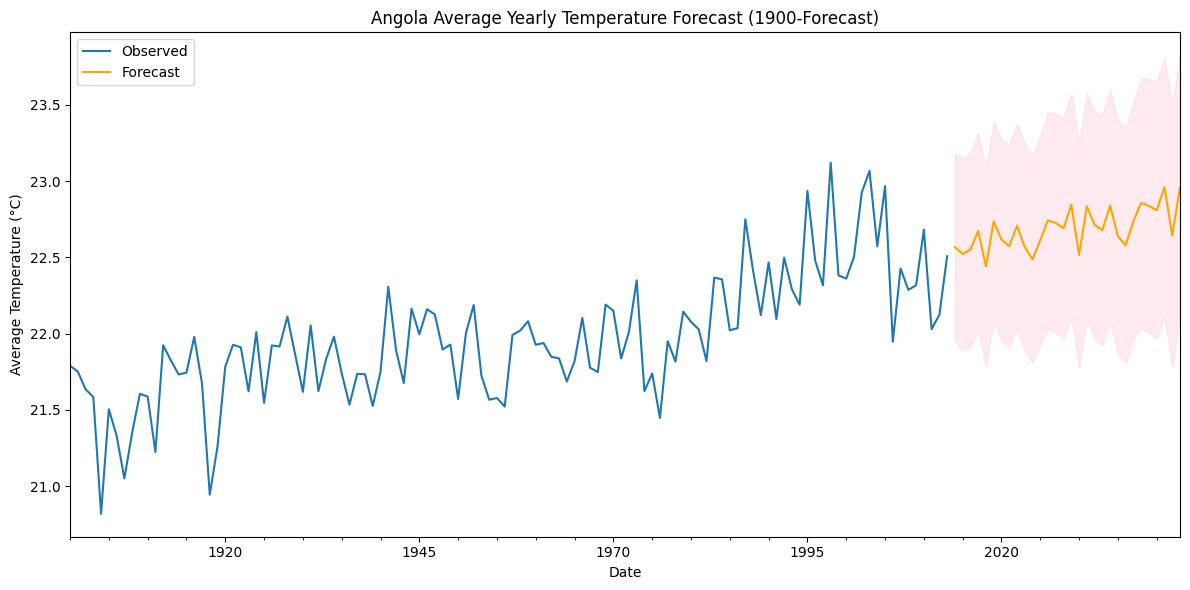

In [221]:
south_africa_df = file[file['Country'] == 'Angola'].sort_values('dt')
south_africa_df = south_africa_df.set_index('dt')

yearly_avg = south_africa_df.groupby('dt')['AverageTemperature'].mean().resample('Y').mean()
yearly_avg = yearly_avg.dropna()

model = SARIMAX(yearly_avg, 
                order=(1,1,1), 
                seasonal_order=(1,1,1,12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
results = model.fit()

forecast = results.get_forecast(steps=30)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

predicted_mean.index = pd.date_range(start=yearly_avg.index[-1] + pd.DateOffset(years=1),
                                      periods =30, freq='Y')
conf_int.index = predicted_mean.index

start_date = '1900-01-01'
end_date = predicted_mean.index[-1]


yearly_avg.loc['1900':].plot(label='Observed', figsize=(12, 6))

predicted_mean.plot(label='Forecast', color='orange')

plt.fill_between(predicted_mean.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)

plt.xlim([start_date, end_date])
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('Angola Average Yearly Temperature Forecast (1900-Forecast)')
plt.legend()
plt.tight_layout()
plt.show
()

### Forecasting Avg Temp for India

C:\Users\elija\AppData\Local\Temp\ipykernel_44160\123654870.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg = india_df.groupby('dt')['AverageTemperature'].mean().resample('Y').mean()
c:\Launch Training\Week 1\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Launch Training\Week 1\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Launch Training\Week 1\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return ge

()

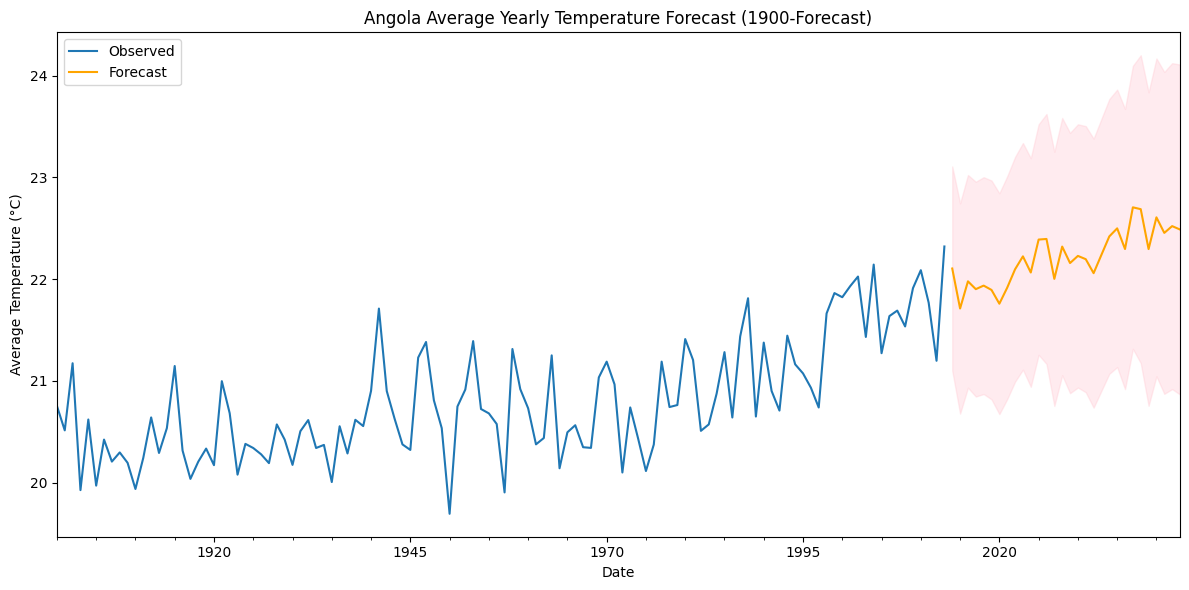

In [ ]:
india_df = file[file['Country'] == 'India'].sort_values('dt')
india_df = india_df.set_index('dt')

yearly_avg = india_df.groupby('dt')['AverageTemperature'].mean().resample('Y').mean()
yearly_avg = yearly_avg.dropna()

model = SARIMAX(yearly_avg, 
                order=(1,1,1), 
                seasonal_order=(1,1,1,12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
results = model.fit()

forecast = results.get_forecast(steps=30)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

predicted_mean.index = pd.date_range(start=yearly_avg.index[-1] + pd.DateOffset(years=1),
                                      periods =30, freq='Y')
conf_int.index = predicted_mean.index

start_date = '1900-01-01'
end_date = predicted_mean.index[-1]


yearly_avg.loc['1900':].plot(label='Observed', figsize=(12, 6))

predicted_mean.plot(label='Forecast', color='orange')

plt.fill_between(predicted_mean.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)

plt.xlim([start_date, end_date])
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('Angola Average Yearly Temperature Forecast (1900-Forecast)')
plt.legend()
plt.tight_layout()
plt.show
()

### Forecasting Avg Temp for Pakistan

C:\Users\elija\AppData\Local\Temp\ipykernel_44160\3103933061.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg = pakistan_df.groupby('dt')['AverageTemperature'].mean().resample('Y').mean()
c:\Launch Training\Week 1\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Launch Training\Week 1\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Launch Training\Week 1\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  retur

()

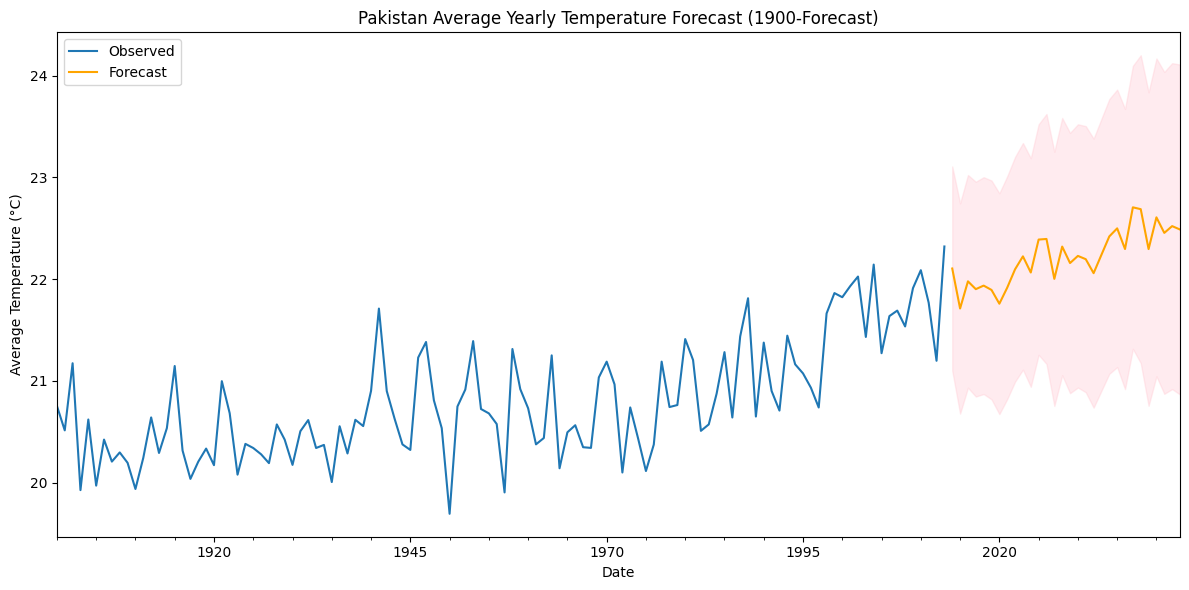

In [293]:
pakistan_df = file[file['Country'] == 'Pakistan'].sort_values('dt')
pakistan_df = pakistan_df.set_index('dt')

yearly_avg = pakistan_df.groupby('dt')['AverageTemperature'].mean().resample('Y').mean()
yearly_avg = yearly_avg.dropna()

model = SARIMAX(yearly_avg, 
                order=(1,1,1), 
                seasonal_order=(1,1,1,12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
results = model.fit()

forecast = results.get_forecast(steps=30)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

predicted_mean.index = pd.date_range(start=yearly_avg.index[-1] + pd.DateOffset(years=1),
                                      periods =30, freq='Y')
conf_int.index = predicted_mean.index

start_date = '1900-01-01'
end_date = predicted_mean.index[-1]


yearly_avg.loc['1900':].plot(label='Observed', figsize=(12, 6))

predicted_mean.plot(label='Forecast', color='orange')

plt.fill_between(predicted_mean.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)

plt.xlim([start_date, end_date])
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('Pakistan Average Yearly Temperature Forecast (1900-Forecast)')
plt.legend()
plt.tight_layout()
plt.show
()

### Forecasting Avg Temp for China

C:\Users\elija\AppData\Local\Temp\ipykernel_44160\2098385018.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg = china_df.groupby('dt')['AverageTemperature'].mean().resample('Y').mean()
c:\Launch Training\Week 1\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Launch Training\Week 1\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Launch Training\Week 1\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return g

()

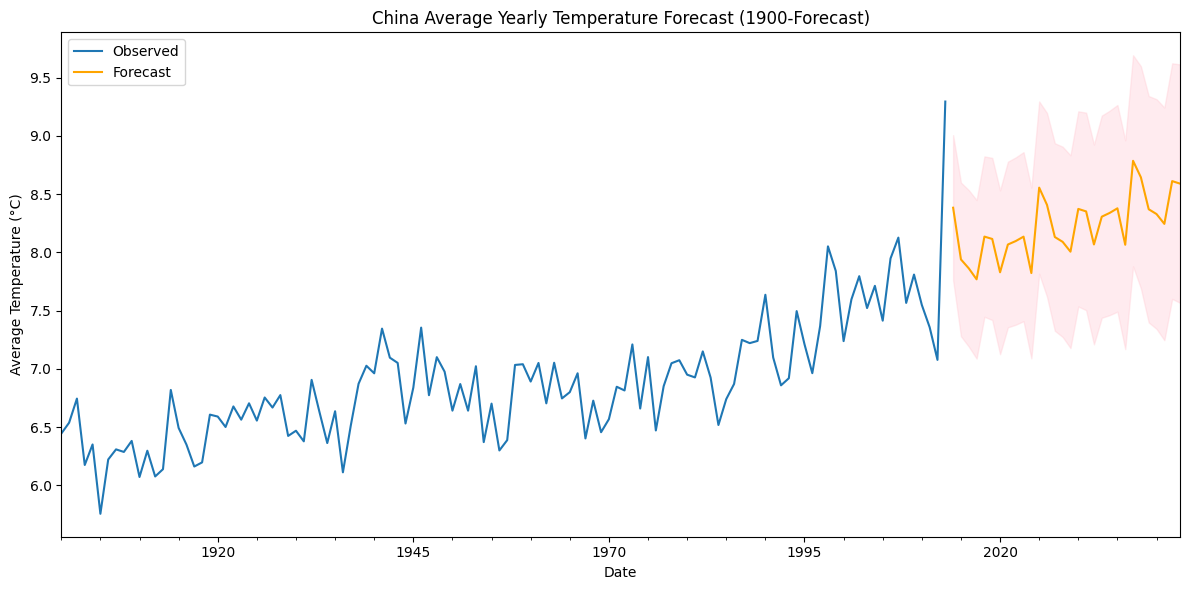

In [294]:
china_df = file[file['Country'] == 'China'].sort_values('dt')
china_df = china_df.set_index('dt')

yearly_avg = china_df.groupby('dt')['AverageTemperature'].mean().resample('Y').mean()
yearly_avg = yearly_avg.dropna()

model = SARIMAX(yearly_avg, 
                order=(1,1,1), 
                seasonal_order=(1,1,1,12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
results = model.fit()

forecast = results.get_forecast(steps=30)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

predicted_mean.index = pd.date_range(start=yearly_avg.index[-1] + pd.DateOffset(years=1),
                                      periods =30, freq='Y')
conf_int.index = predicted_mean.index

start_date = '1900-01-01'
end_date = predicted_mean.index[-1]


yearly_avg.loc['1900':].plot(label='Observed', figsize=(12, 6))

predicted_mean.plot(label='Forecast', color='orange')

plt.fill_between(predicted_mean.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)

plt.xlim([start_date, end_date])
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('China Average Yearly Temperature Forecast (1900-Forecast)')
plt.legend()
plt.tight_layout()
plt.show
()

### Forecasting Avg Temp Papua New Guinea

C:\Users\elija\AppData\Local\Temp\ipykernel_44160\1937587108.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg = png_df.groupby('dt')['AverageTemperature'].mean().resample('Y').mean()
C:\Users\elija\AppData\Local\Temp\ipykernel_44160\1937587108.py:18: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  predicted_mean.index = pd.date_range(start=yearly_avg.index[-1] + pd.DateOffset(years=1),


()

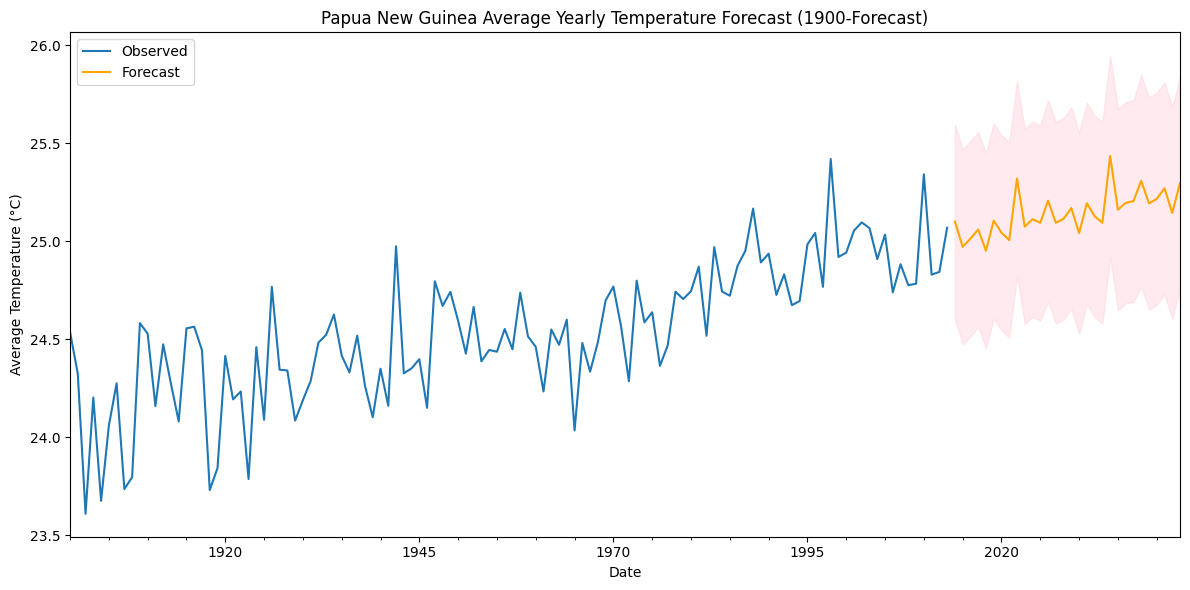

In [266]:
png_df = file[file['Country'] == 'Papua New Guinea'].sort_values('dt')
png_df = png_df.set_index('dt')

yearly_avg = png_df.groupby('dt')['AverageTemperature'].mean().resample('Y').mean()
yearly_avg = yearly_avg.dropna()

model = SARIMAX(yearly_avg, 
                order=(1,1,1), 
                seasonal_order=(1,1,1,12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
results = model.fit()

forecast = results.get_forecast(steps=30)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

predicted_mean.index = pd.date_range(start=yearly_avg.index[-1] + pd.DateOffset(years=1),
                                      periods =30, freq='Y')
conf_int.index = predicted_mean.index

start_date = '1900-01-01'
end_date = predicted_mean.index[-1]


yearly_avg.loc['1900':].plot(label='Observed', figsize=(12, 6))

predicted_mean.plot(label='Forecast', color='orange')

plt.fill_between(predicted_mean.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)

plt.xlim([start_date, end_date])
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('Papua New Guinea Average Yearly Temperature Forecast (1900-Forecast)')
plt.legend()
plt.tight_layout()
plt.show
()

### Forecasting Avg Temp for Italy

C:\Users\elija\AppData\Local\Temp\ipykernel_44160\3825323105.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg = italy_df.groupby('dt')['AverageTemperature'].mean().resample('Y').mean()
c:\Launch Training\Week 1\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Launch Training\Week 1\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Launch Training\Week 1\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return g

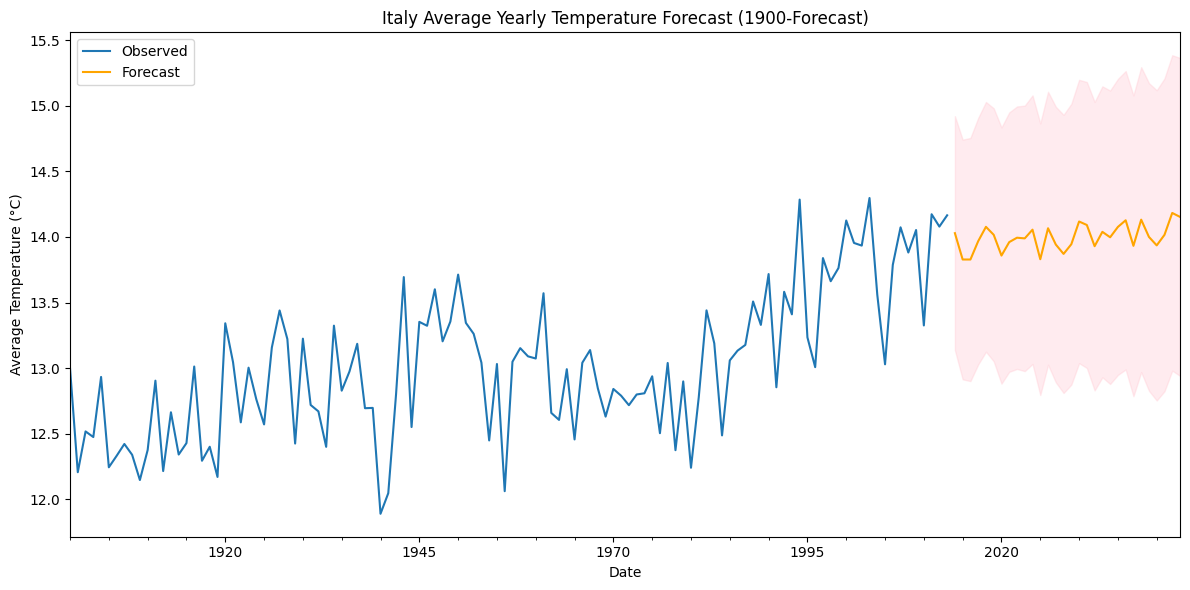

In [295]:
italy_df = file[(file['Country'] == 'Italy') | (file['Country'] == 'Italy (Europe)')].sort_values('dt')
italy_df = italy_df.set_index('dt')

yearly_avg = italy_df.groupby('dt')['AverageTemperature'].mean().resample('Y').mean()
yearly_avg = yearly_avg.dropna()

model = SARIMAX(yearly_avg, 
                order=(1,1,1), 
                seasonal_order=(1,1,1,12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
results = model.fit()

forecast = results.get_forecast(steps=30)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

predicted_mean.index = pd.date_range(start=yearly_avg.index[-1] + pd.DateOffset(years=1),
                                      periods =30, freq='Y')
conf_int.index = predicted_mean.index

start_date = '1900-01-01'
end_date = predicted_mean.index[-1]


yearly_avg.loc['1900':].plot(label='Observed', figsize=(12, 6))

predicted_mean.plot(label='Forecast', color='orange')

plt.fill_between(predicted_mean.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)

plt.xlim([start_date, end_date])
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('Italy Average Yearly Temperature Forecast (1900-Forecast)')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\elija\AppData\Local\Temp\ipykernel_44160\4078898207.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg = italy_df.groupby('dt')['AverageTemperature'].mean().resample('Y').mean()
c:\Launch Training\Week 1\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Launch Training\Week 1\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Launch Training\Week 1\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return g

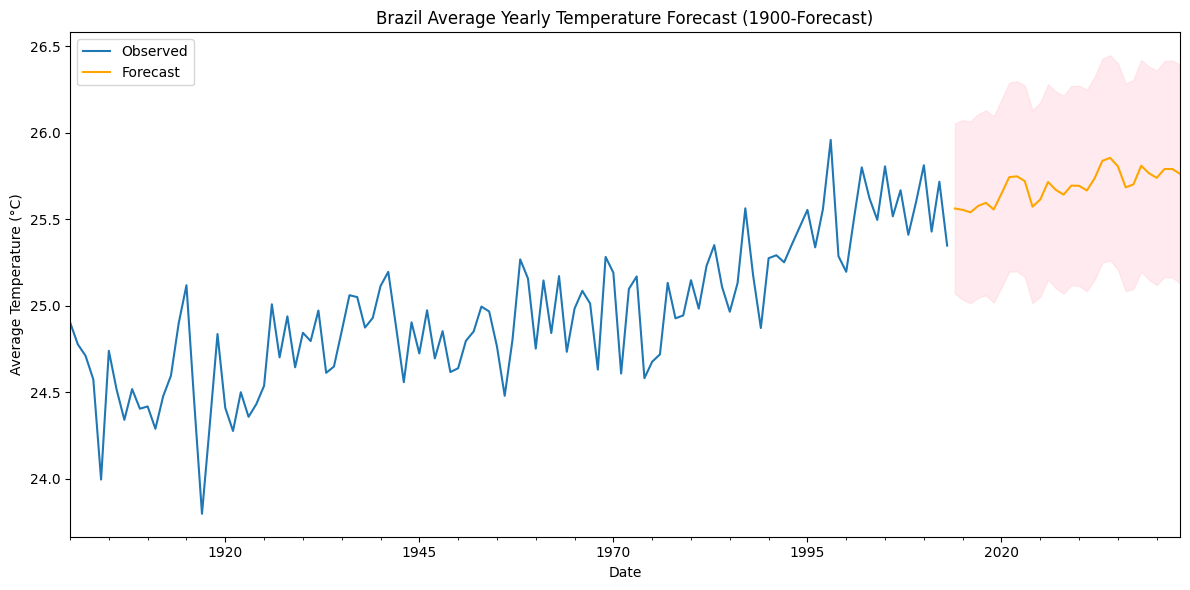

In [298]:
italy_df = file[(file['Country'] == 'Brazil')].sort_values('dt')
italy_df = italy_df.set_index('dt')

yearly_avg = italy_df.groupby('dt')['AverageTemperature'].mean().resample('Y').mean()
yearly_avg = yearly_avg.dropna()

model = SARIMAX(yearly_avg, 
                order=(1,1,1), 
                seasonal_order=(1,1,1,12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
results = model.fit()

forecast = results.get_forecast(steps=30)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

predicted_mean.index = pd.date_range(start=yearly_avg.index[-1] + pd.DateOffset(years=1),
                                      periods =30, freq='Y')
conf_int.index = predicted_mean.index

start_date = '1900-01-01'
end_date = predicted_mean.index[-1]


yearly_avg.loc['1900':].plot(label='Observed', figsize=(12, 6))

predicted_mean.plot(label='Forecast', color='orange')

plt.fill_between(predicted_mean.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)

plt.xlim([start_date, end_date])
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('Brazil Average Yearly Temperature Forecast (1900-Forecast)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
italy_df = file[(file['Continent'] == 'South America')].sort_values('dt')
italy_df = italy_df.set_index('dt')

yearly_avg = italy_df.groupby('dt')['AverageTemperature'].mean().resample('Y').mean()
yearly_avg = yearly_avg.dropna()

model = SARIMAX(yearly_avg, 
                order=(1,1,1), 
                seasonal_order=(1,1,1,12), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
results = model.fit()

forecast = results.get_forecast(steps=30)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

predicted_mean.index = pd.date_range(start=yearly_avg.index[-1] + pd.DateOffset(years=1),
                                      periods =30, freq='Y')
conf_int.index = predicted_mean.index

start_date = '1900-01-01'
end_date = predicted_mean.index[-1]


yearly_avg.loc['1900':].plot(label='Observed', figsize=(12, 6))

predicted_mean.plot(label='Forecast', color='orange')

plt.fill_between(predicted_mean.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='pink', alpha=0.3)

plt.xlim([start_date, end_date])
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('Brazil Average Yearly Temperature Forecast (1900-Forecast)')
plt.legend()
plt.tight_layout()
plt.show()